<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Install Packages

!pip install keras

!pip install tensorflow

# Lab 10.2: CNN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- A guide you are encouraged to read through is TensorFlow's own tutorial for image classification, which can be found [here](https://www.tensorflow.org/tutorials/images/cnn)

# CIFAR10 small image classification
- [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset of color training images, labeled over 10 categories.

It has the classes:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

# Import libraries

In [129]:
# Uncomment the statements below if there are problems with TensorFlow on macOS
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [130]:
# Import Libraries
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [131]:
# Import tensorflow and keras
import tensorflow
from tensorflow import keras
from keras.datasets import cifar10
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import MaxPool2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [132]:
# Uncomment the statement below to allow online monitoring with TensorBoard (need to be installed)
from keras.callbacks import TensorBoard

# Load data
Use the **Keras**' load method.

In [133]:
keras.datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [134]:
'''
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
'''

"\ndef unpickle(file):\n    import pickle\n    with open(file, 'rb') as fo:\n        dict = pickle.load(fo, encoding='bytes')\n    return dict\n"

In [135]:
'''
# insert code here
data_batch_1 = unpickle('..\Data\cifar\data_batch_1')
data_batch_2 = unpickle('..\Data\cifar\data_batch_2')
data_batch_3 = unpickle('..\Data\cifar\data_batch_3')
data_batch_4 = unpickle('..\Data\cifar\data_batch_4')
data_batch_5 = unpickle('..\Data\cifar\data_batch_5')
'''

"\n# insert code here\ndata_batch_1 = unpickle('..\\Data\\cifar\\data_batch_1')\ndata_batch_2 = unpickle('..\\Data\\cifar\\data_batch_2')\ndata_batch_3 = unpickle('..\\Data\\cifar\\data_batch_3')\ndata_batch_4 = unpickle('..\\Data\\cifar\\data_batch_4')\ndata_batch_5 = unpickle('..\\Data\\cifar\\data_batch_5')\n"

In [136]:
'''
data_batch_4
'''

'\ndata_batch_4\n'

In [137]:
(X_train_all, t_train_all), (X_test_all, t_test_all) = cifar10.load_data()

In [138]:
# take a small sample of data
size = 50000
X_train = X_train_all[:size,:,:,:]
t_train = t_train_all[0:size,:]

X_test = X_test_all[0:size,:,:,:]
t_test = t_test_all[0:size,:]

In [139]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [140]:
classes = (
    'plane',
    'car',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck')

## Check some data

In [141]:
# insert code here
def check_one(data, label, id=None, actual=None, compare=False):
    # Check one
    if id is None:
        id = np.random.randint(data.shape[0])
    im = data[id]
    plt.figure(figsize = (3,3))
    plt.imshow(im)
    
    l_id = label[id]
    if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
        a_id = np.argmax(actual[id])
        plt.title('Classes %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], a_id, classes[a_id]))
    else:
        plt.title('Classes %d (%s)' % (l_id, classes[l_id]))
    
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [142]:
def check_ten(data, label, actual=None, compare=False):
    # Check ten
    fig, ax=plt.subplots(2, 5, figsize=(11,5))
    fig.subplots_adjust(left=0.02, right=0.98, top=0.8, wspace=0.2, hspace=0.2)
    fig.suptitle('Check Data', fontsize=12, fontweight='bold')
    
    plt.rcParams.update({'font.size':10})
    
    ids = np.random.randint(data.shape[0], size=10)
    r=0
    c=0
    for id in ids:
        im=data[id]
        
        # original image
        
        ax[r,c].imshow(im)
        l_id = label[id]
        if (compare) and (actual is not None) and (l_id != np.argmax(actual[id])):
            a_id = np.argmax(actual[id])
            ax[r,c].set_title('Class %d (%s) [\u2260 %d-%s]' % (l_id, classes[l_id], classes[l_id], a_id, classes[a_id]))
        else:
            ax[r,c].set_title('Class %d (%s)' % (l_id, classes[l_id]))
        ax[r,c].set_xticks([])
        ax[r,c].set_yticks([])
        c += 1
        if c>4:
            r += 1
            c = 0
    plt.show()

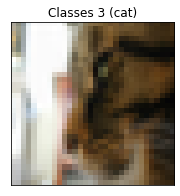

In [143]:
check_one(X_train, t_train.flatten())

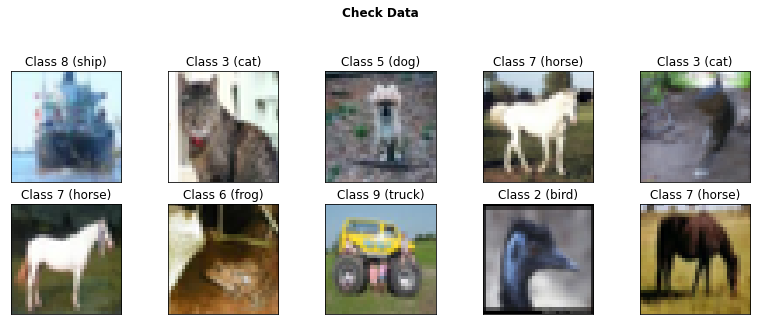

In [144]:
check_ten(X_train, t_train.flatten())

## Prepare data

In [145]:
# insert code here
_, img_rows, img_cols, img_channels = X_train.shape
num_classes = len(set(t_train.flatten()))

# Convert the target to categorial
y_train = to_categorical(
    t_train,
    num_classes = num_classes,
    dtype = 'uint8')

y_test = to_categorical(
    t_test,
    num_classes = num_classes,
    dtype = 'uint8')

In [146]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

# Create the model's architecture
- **NOTE ALERT**: Take into account the volume of data and parameters. Time and processing escalate quite fast.
- **NOTE ALERT**: It is likely this data will require more complex models.

In [147]:
# insert code here
model = Sequential()

## Compile the model

In [148]:
# insert code here
model.add(Conv2D(48, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(48, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(96, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(192, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(192, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [149]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 48)        1344      
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 48)        20784     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 48)       0         
 2D)                                                             
                                                                 
 dropout_10 (Dropout)        (None, 15, 15, 48)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 15, 15, 96)        41568     
                                                                 
 conv2d_15 (Conv2D)          (None, 13, 13, 96)        83040     
                                                      

In [150]:
model.compile(optimizer = 'adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Fit the training data

In [ ]:
# Uncomment the statement below to allow online monitoring with TensorBoard
# tensorboard = TensorBoard(log_dir = 'logs') # choose or create a directory for the logs

tensorboard = TensorBoard(log_dir='logs')

In [ ]:
%%time
# Fit the model on a training set
fitted_model = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=10,
    callbacks=[tensorboard],
    verbose=0)
print(f'Training accuracy:{fitted_model.history["accuracy"][-1]:.2f} validation accuracy:{fitted_model.history["val_accuracy"][-1]:.2f} ')    

### TensorBoard
- TensorBoard is TensorFlow's visualisation toolkit. 
- If Tensorflow 2 and Jupyter is installed in the same environment, running the cell below will start TensorBoard within the notebook.
- More information about how to set up TensorBoard can be found [here](https://www.tensorflow.org/tensorboard/tensorboard_in_notebooks)


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

# Create predictions

In [ ]:
%%time
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)
predictions

# Evaluate the model

In [ ]:
# insert code here
score = model.evaluate(X_test, y_test, batch_size=10)
print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score))

In [ ]:
def print_cm(cm):
    d_size = max(len('%d' % cm.max()), len('%d'% cm.shape[1]))
    if min(cm.shape) > 10:
        print('Sparse Matrix (*=diagonal)')
        fmt_c = ', c%%0%dd%%s=%%%dd' % (d_size, dsize)
        for i in range(cm.shape[0]):
            s = fmt_r % i
            for j in range(cm.shape[1]):
                if cm[i,j] > 0:
                    s += fmt_c % (j, '*' if i==j else '', cm[i,j])
                print(s)
    else:
        c = '%%%dd ' % d_size
        s = '%s| ' % (' '  * d_size)
        s += ''.join([c % i for i in range(len(cm[0]))])
        print(s)
        print('-' * len(s))
        for i, r in enumerate(cm):
            s = '%%%dd| ' % d_size
            s = s % i
            s += c * len(r)
            print(s % tuple(r))

In [ ]:
y_test_target = np.array([x.argmax() for x in y_test])
cm = confusion_matrix(y_test_target, predictions)
print_cm(cm)

# Visualisation of cost

In [ ]:
# insert code here
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(fitted_model.history['accuracy'])
ax[0].plot(fitted_model.history['val_accuracy'])
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'])

# Plot training & validation loss values
ax[1].plot(fitted_model.history['loss'])
ax[1].plot(fitted_model.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'])

plt.show()

# Results

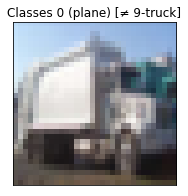

In [123]:
# insert code here
check_one(X_test, predictions, actual=y_test, compare=True)

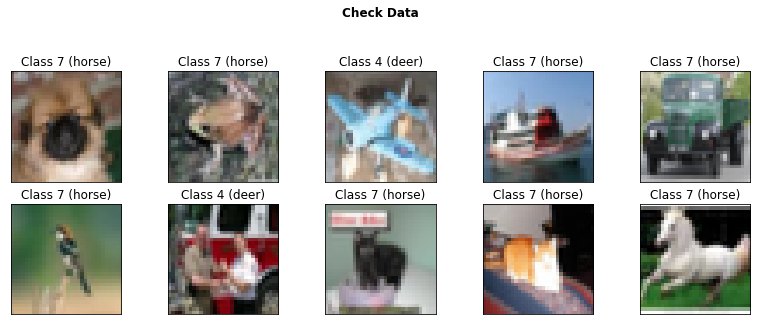

In [122]:
check_ten(X_test, predictions, actual=y_test)

# Save and Load models and weights

## Save

In [125]:
# Save Model
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
    
# Save Weights
model.save_weights('model.h5')

## Load

In [126]:
# import the module to convert a json file to a model
from keras.models import model_from_json

In [127]:
model = Sequential()

In [128]:
# load model
with open('model.json', 'r') as json_file:
    model_json = json_file.read()
new_model = model_from_json(model_json)

# load weights
new_model.load_weights('model.h5')

In [ ]:
# complile the new model
new_model.compile(optimizer = 'adam',
                    loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

© 2020 Institute of Data